<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2026/blob/main/labs/day05_lab_spurlock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMML Day 5 lab: visualization
## Scott Spurlock
### 2/17/2026

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url = 'https://drive.google.com/uc?export=download&id=18O_DAbFP6JtDQNAPjmHUSavyytnGei01'
df = pd.read_csv(url)
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Investigate the data by looking at the number of nulls and unique values per column, as well as the data types of the columns.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
df.nunique()

,0
Unnamed: 0,53940
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552


## Drop unneeded/unhelpful column(s).

In [4]:
df = df.drop('Unnamed: 0', axis=1)

## Filter out rows with zero length, width, or height. (Just use a mask that indicates which rows to keep.)

In [5]:
# a mask tells which rows to keep
mask = (df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)
df = df[mask]

In [6]:
# sanity check
df[df['x'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


# Visualizations

## Price

## Caret


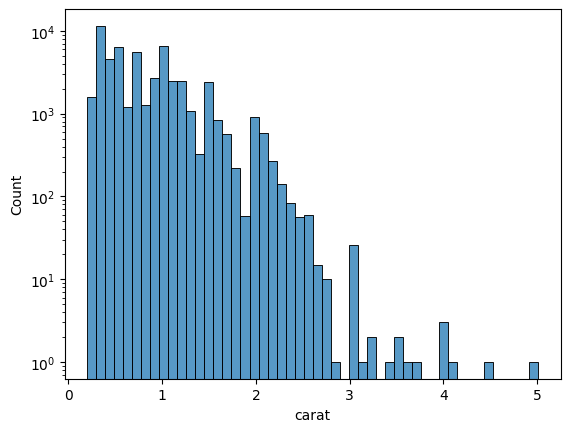

In [7]:
sns.histplot(df, x='carat', bins=50)
plt.yscale('log')

## cut

Text(0.5, 1.0, 'Cut distribution')

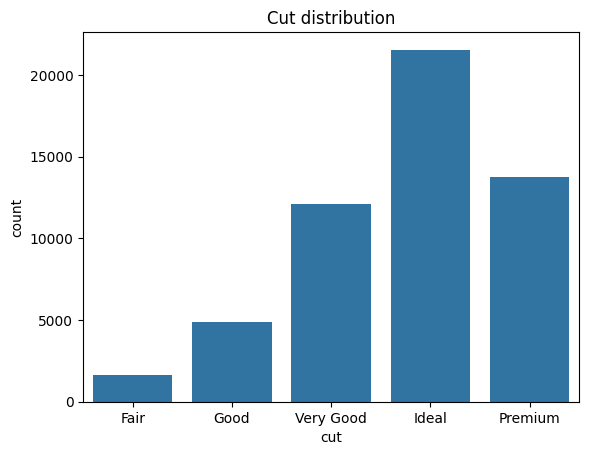

In [8]:
labels = ['Fair', 'Good', 'Very Good', 'Ideal', 'Premium']
sns.countplot(df, x="cut", order=labels)
plt.title('Cut distribution')

## cut and color

<Axes: xlabel='cut'>

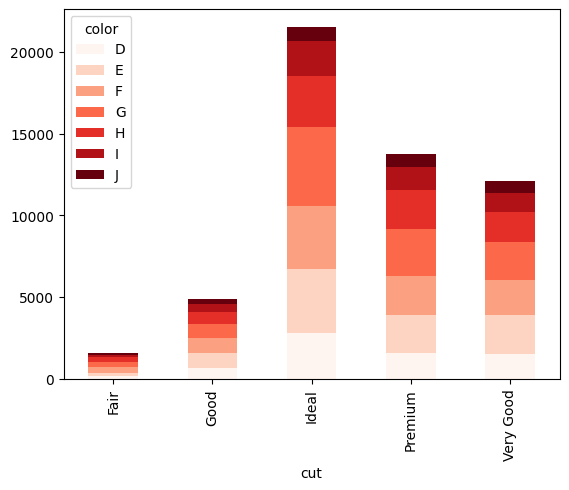

In [9]:
df.pivot_table(index='cut', columns='color', values='price', aggfunc='count', sort=True).plot(kind='bar', cmap='Reds', stacked=True)

Text(0.5, 1.0, 'Count of diamonds by cut and color')

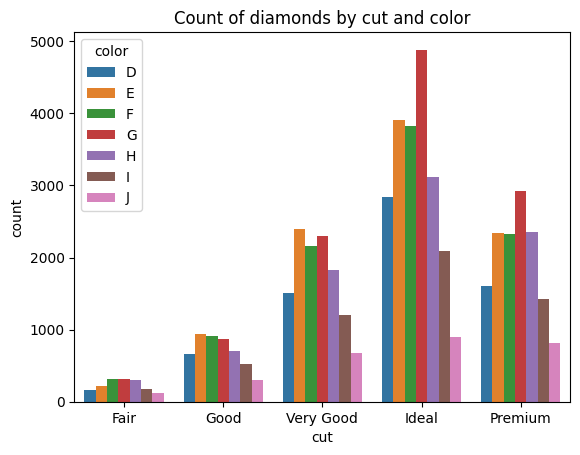

In [10]:
labels = ['Fair', 'Good', 'Very Good', 'Ideal', 'Premium']
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
sns.countplot(df, x="cut", hue="color", order=labels, hue_order=color_order)
plt.title("Count of diamonds by cut and color")

## price and cut

Text(0.5, 0, 'Cut')

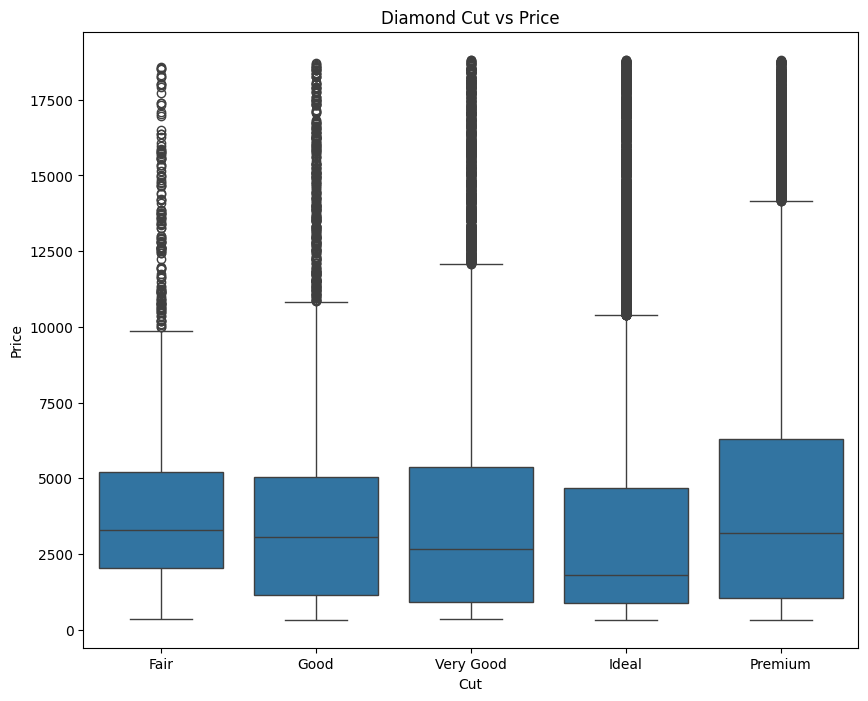

In [11]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="cut",y="price", data=df, order=labels)
ax.set_title("Diamond Cut vs Price")
ax.set_ylabel("Price")
ax.set_xlabel("Cut")

## color, length, carat

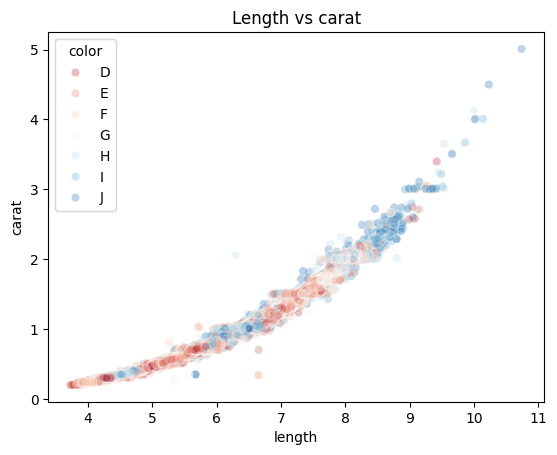

In [12]:
sns.scatterplot(df, x="x", y="carat", hue="color", alpha=0.3, hue_order=color_order, palette='RdBu')
plt.xlabel("length")
plt.title('Length vs carat')
plt.show()

## Find the variable most correlated with expensive diamonds (not counting the price itself) by making a correlation heatmap.

We can only calculate correlation for numeric variables. It would be nice if we could convert the ordinal categorical variables to numbers.

Text(0.5, 1.0, 'Correlation')

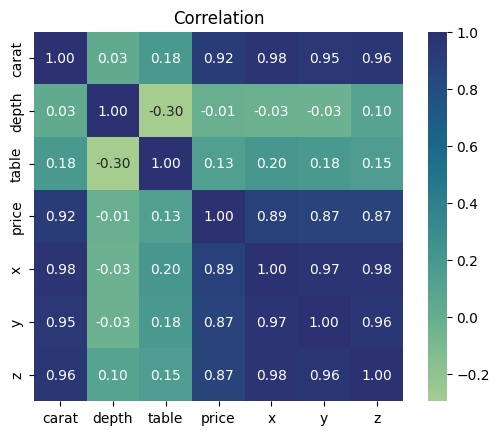

In [13]:
corr_mat = df[["carat", "depth", "table", "price","x", "y", "z"]].corr()
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', cbar=True, cmap="crest")
plt.title('Correlation')